In [10]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#a)

In [11]:
data = load_digits()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)
print("test: X: {}  Y: {}".format(x_test.shape, y_test.shape))
print("train: X: {}  Y: {}".format( x_train.shape, y_train.shape))

test: X: (540, 64)  Y: (540,)
train: X: (1257, 64)  Y: (1257,)


#b)

In [12]:
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#c)

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train)

y_pred = knn.predict(x_test_scaled)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        54
           4       0.98      1.00      0.99        60
           5       0.98      0.98      0.98        66
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        43
           9       0.98      0.95      0.97        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



#d)

In [14]:
# Create a KNN classifier with K=5
knn = KNeighborsClassifier(n_neighbors=5)

# Compute the cross-validation scores for the classifier
cv_scores = cross_val_score(knn, x_train_scaled, y_train, cv=10)

# Compute the cross-validation predictions for the classifier
cv_predictions = cross_val_predict(knn, x_train_scaled, y_train, cv=10)

# Compute the average performance metrics and their standard deviations
avg_accuracy = accuracy_score(y_train, cv_predictions)
std_accuracy = cv_scores.std()
avg_precision = precision_score(y_train, cv_predictions, average='weighted')
std_precision = cross_val_score(knn, x_train_scaled, y_train, cv=10, scoring='precision_weighted').std()
avg_recall = recall_score(y_train, cv_predictions, average='weighted')
std_recall = cross_val_score(knn, x_train_scaled, y_train, cv=10, scoring='recall_weighted').std()
avg_f1 = f1_score(y_train, cv_predictions, average='weighted')
std_f1 = cross_val_score(knn, x_train_scaled, y_train, cv=10, scoring='f1_weighted').std()

# Print the average performance metrics and their standard deviations
print("Average Accuracy: {:.2f} (+/- {:.2f})".format(avg_accuracy, std_accuracy))
print("Average Precision: {:.2f} (+/- {:.2f})".format(avg_precision, std_precision))
print("Average Recall: {:.2f} (+/- {:.2f})".format(avg_recall, std_recall))
print("Average F1-score: {:.2f} (+/- {:.2f})".format(avg_f1, std_f1))

Average Accuracy: 0.98 (+/- 0.01)
Average Precision: 0.98 (+/- 0.01)
Average Recall: 0.98 (+/- 0.01)
Average F1-score: 0.98 (+/- 0.01)


#e)

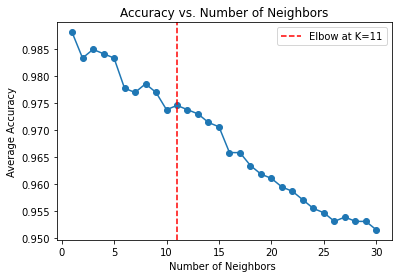

In [15]:
import numpy as np

avg_accuracy = []

k_values = range(1, 31)

# Iterate over each value of K
for k in k_values:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, x_train_scaled, y_train, cv=10)
    avg_score = cv_scores.mean()
    avg_accuracy.append(avg_score)


plt.plot(k_values, avg_accuracy, 'o-')
plt.xlabel('Number of Neighbors ')
plt.ylabel('Average Accuracy')
plt.title('Accuracy vs. Number of Neighbors')

elbow_k = np.argmin(np.abs(np.gradient(avg_accuracy)))
plt.axvline(x=k_values[elbow_k], linestyle='--', color='r', label=f'Elbow at K={k_values[elbow_k]}')
plt.legend()

plt.show()